#Name: Ramya Banda
#ECE 595 Machine Learning II
#Project 4: Adversarial Machine Learning - Code

In [ ]:
!nvidia-smi

Wed Nov 13 00:13:44 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:

!pip install cleverhans==2.1.0

In [ ]:
#Import necessary packages
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2

Using TensorFlow backend.


#Part 1: Training a target classifier

In [ ]:
# Load data MNIST data and normalize to [0, 1]

(data_train,labels_train),(data_test,labels_test) = mnist.load_data( )
data_train = (data_train/255.0)
data_test = (data_test/255.0)
#Reshape training and testing data into 784-dimensional vectors 

print(data_train.shape)
data_train = data_train.reshape(60000, 784)
data_test = data_test.reshape(10000, 784)
print(data_train.shape)
#Convert integer labels for training and testing data into one-hot vectors 

labels_train= keras.utils.np_utils.to_categorical(labels_train,num_classes=10)
labels_test= keras.utils.np_utils.to_categorical(labels_test,num_classes=10)
print(labels_train.shape)
#Create classifier architecture, compile it, and train it

latent_dim = 784
data_dim = 10

def create_classifier():

  classifier=Sequential()
  classifier.add(Dense(100,input_dim=784,activation="relu"))
  classifier.add(BatchNormalization())
  classifier.add(Dense(100,activation="relu"))
  classifier.add(BatchNormalization())
  classifier.add(Dense(10, activation="softmax"))
  return classifier


classifier = create_classifier()
classifier.summary()
classifier.compile(loss="categorical_crossentropy",optimizer="adam", metrics = ["accuracy"])
num_epochs = 50
batch_size = 256
classifier_history=classifier.fit(data_train,labels_train,validation_data=(data_test,labels_test),epochs=num_epochs,batch_size=batch_size,shuffle=True)
scores = classifier.evaluate(data_test, labels_test)

W1113 00:13:56.963793 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1113 00:13:56.970455 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1113 00:13:56.976870 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1113 00:13:57.057754 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1113 00:13:57.141688 140568910866304 modu

(60000, 28, 28)
(60000, 784)
(60000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 90,410
Trainable params: 90,010
Non-trainable params: 400
_________________________________________________________________


W1113 00:13:57.246155 140568910866304 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1113 00:13:57.449676 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1113 00:13:57.543714 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1113 00:13:57.632396 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Se

Train on 60000 samples, validate on 10000 samples
Epoch 1/50


W1113 00:13:58.905534 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1113 00:13:58.909976 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1113 00:13:59.083713 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 6s 97us/step - loss: 0.3104 - acc: 0.9094 - val_loss: 0.1511 - val_acc: 0.9549
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1179 - acc: 0.9654 - val_loss: 0.1162 - val_acc: 0.9646
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0800 - acc: 0.9758 - val_loss: 0.0963 - val_acc: 0.9704
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0586 - acc: 0.9822 - val_loss: 0.0963 - val_acc: 0.9690
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0434 - acc: 0.9877 - val_loss: 0.0821 - val_acc: 0.9750
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0334 - acc: 0.9905 - val_loss: 0.0874 - val_acc: 0.9716
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0265 - acc: 0.9922 - val_loss: 0.0886 - val_acc: 0.9724
Epoch 8/50
60000/60000 [============================

/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


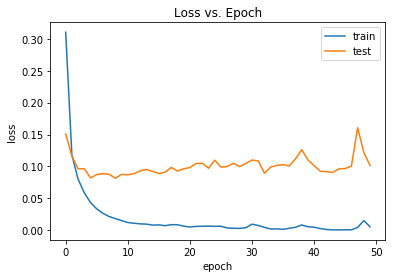

In [ ]:
#Plot loss vs epoch

plt.plot(classifier_history.history["loss"])
plt.plot(classifier_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc = "upperleft")
plt.show( )

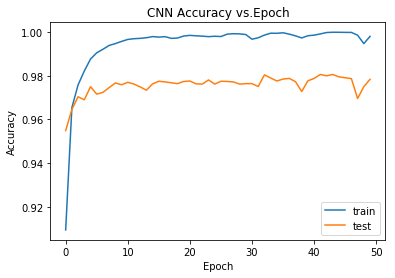

In [ ]:
#Plot accuracy vs epoch

plt.plot(classifier_history.history["acc"])
plt.plot(classifier_history.history["val_acc"])
plt.title("CNN Accuracy vs.Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc = "upperleft")
plt.show( )

In [ ]:
#Print accuracy of classifier on MNIST testing data

print("Accuracy : %.2f%%" % (scores[1]*100))


Accuracy : 97.84%


In [ ]:

#Get TensorFlow Session to pass into Cleverhans modules
sess = backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
wrap = KerasModelWrapper(classifier)

#Part 2: The Fast Gradient Method (FGM)

In [ ]:
#Implementing the FGSM attack

#FGM Instance on trained classifier from Part 1

fgm = FastGradientMethod(wrap , sess=sess)

#Attack parameters

fgm_params = {'eps':0.25, 'clip_min':0.0,'clip_max':1.0}

#Generate adversarial data

fgm_attack_data_test = fgm.generate_np(data_test, **fgm_params)

#Evaluate accuracy on target classifier 

fgm_adv_scores = classifier.evaluate(fgm_attack_data_test, labels_test)
print("FGM Adverserial Attack Accuracy: %2f%%" %(fgm_adv_scores[1]*100))


W1112 22:10:22.693730 140144865326976 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/cleverhans/utils_tf.py:368: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1112 22:10:22.805969 140144865326976 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks.py:216: calling reduce_max_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W1112 22:10:22.808852 140144865326976 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks.py:218: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1112 22:10:22.812026 140144865326976 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks_tf.py:62: calling reduce_sum_v1 (from tensorflow.pyt

10000/10000 [==============================] - 1s 56us/step
FGM Adverserial Attack Accuracy: 8.280000%


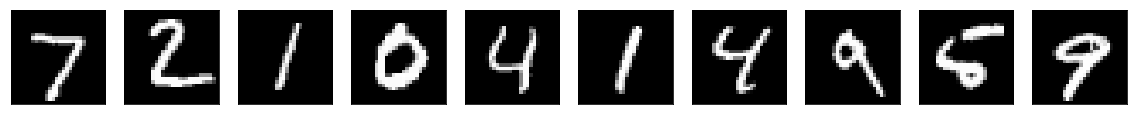

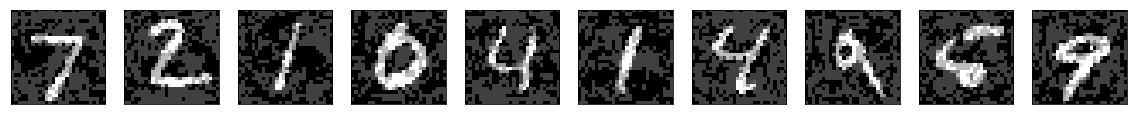

In [ ]:
#Show ten original samples and their corresponding adversarial samples

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(fgm_attack_data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
#Implementing Detection via Autoencoders

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create and train the autoencoder using the mean squared error loss and adam optimizer

ae = autoencoder()
ae.summary()
ae.compile(loss="mean_squared_error",optimizer="adam", metrics = ["accuracy"])
num_epochs = 50
batch_size = 1024
ae_history=ae.fit(data_train,data_train,validation_data=(data_test,data_test),epochs=num_epochs,batch_size=batch_size,shuffle=True)


W1112 22:10:24.173655 140144865326976 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               314384    
Total params: 829,284
Trainable params: 829,284
Non-trainable params: 0
_________________________________________________________________
Trai

In [ ]:
#Using the autoencoder for detection and to determine a threshold 

# Create adversarial examples using FGSM on training data

fgm_attack_data_train = fgm.generate_np(data_train, **fgm_params)

# Obtain reconstruction errors on training set and determine a threshold 

data_train_reconstructions = ae.predict(fgm_attack_data_train)

train_error = keras.losses.mean_squared_error(fgm_attack_data_train,data_train_reconstructions)

# Convert error tensor into NumPy array 

train_error = train_error.eval(session=sess)

# Determine threshold (based on min in this case) and print it 

min_train_error = min(train_error)
print('Minimum error is %f' %min_train_error)

# Calculate error of adversarial testing set

data_test_reconstructions = ae.predict(fgm_attack_data_test)
test_error = keras.losses.mean_squared_error(fgm_attack_data_test, data_test_reconstructions)

test_error = test_error.eval(session=sess)

# Determine how many examples are above threshold and consider them adversarial
# (true positive count)

count = 0
true_positive = [None]
for i in test_error:
  if i > min_train_error:
    true_positive.append(i)
    count = count + 1

# Print number of true positive samples
 
print("Number of true positive samples are %d" %count)

# Determine false positives on benign testing set

data_test_orig_reconstructions = ae.predict(data_test)
test_error_orig = keras.losses.mean_squared_error(data_test, data_test_orig_reconstructions)
test_error_orig = test_error_orig.eval(session=sess)

# Determine how many examples are above threshold and consider them adversarial
# (false positive count)

count1 = 0
false_positive = [None]
for i in test_error_orig:
  if i > min_train_error:
    false_positive.append(i)
    count1 = count1 + 1

# Print number of false positive samples

print("Number of false positive samples are %d" %count1) 

Minimum error is 0.020346
Number of true positive samples are 10000
Number of false positive samples are 1


#Part 3: Projected Gradient Descent

In [ ]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters

pgd_params = {'eps':0.25, 'eps_iter':0.01, 'nb_iter':20, 'clip_min':0.0,'clip_max':1.0}

#Generate adversarial data

pgd_attack_data_test = pgd.generate_np(data_test, **pgd_params)

#Evaluate accuracy of perturbed data on target classifier

pgd_adv_scores = classifier.evaluate(pgd_attack_data_test, labels_test)
print("PGD Adverserial Attack Accuracy: %2f%%" %(pgd_adv_scores[1]*100))

10000/10000 [==============================] - 2s 159us/step
PGD Adverserial Attack Accuracy: 0.990000%


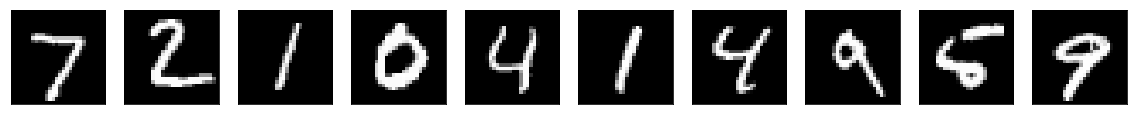

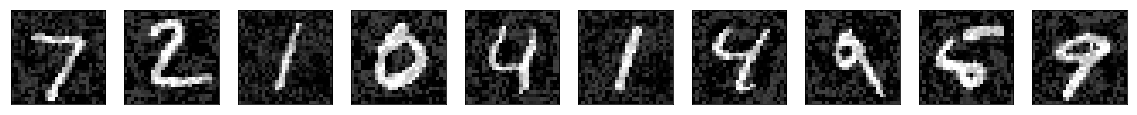

In [ ]:
#Show ten original samples and their corresponding adversarial samples

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(pgd_attack_data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
#Implementing the adversarial training defense

pgd_attack_data_train = pgd.generate_np(data_train, **pgd_params)
pgd_classifier = classifier

#Training the classifier on perturbed training data and original training data
pgd_classifier.compile(loss="categorical_crossentropy",optimizer="adam", metrics = ["accuracy"])
num_epochs = 50
batch_size = 256
pgd_adv_and_orig_data_train=np.concatenate((pgd_attack_data_train,data_train),axis=0)
concat_labels_train=np.concatenate((labels_train,labels_train),axis=0)
pgd_classifier_history=pgd_classifier.fit(pgd_adv_and_orig_data_train,concat_labels_train,validation_data=(data_test,labels_test),epochs=num_epochs,batch_size=batch_size,shuffle=True)


Train on 120000 samples, validate on 10000 samples
Epoch 1/50
120000/120000 [==============================] - 5s 41us/step - loss: 0.9067 - acc: 0.8844 - val_loss: 0.1244 - val_acc: 0.9686
Epoch 2/50
120000/120000 [==============================] - 3s 27us/step - loss: 0.0580 - acc: 0.9821 - val_loss: 0.0975 - val_acc: 0.9736
Epoch 3/50
120000/120000 [==============================] - 3s 27us/step - loss: 0.0268 - acc: 0.9916 - val_loss: 0.0904 - val_acc: 0.9782
Epoch 4/50
120000/120000 [==============================] - 3s 28us/step - loss: 0.0158 - acc: 0.9952 - val_loss: 0.0877 - val_acc: 0.9787
Epoch 5/50
120000/120000 [==============================] - 3s 27us/step - loss: 0.0102 - acc: 0.9971 - val_loss: 0.0978 - val_acc: 0.9782
Epoch 6/50
120000/120000 [==============================] - 3s 27us/step - loss: 0.0080 - acc: 0.9978 - val_loss: 0.0907 - val_acc: 0.9788
Epoch 7/50
120000/120000 [==============================] - 3s 28us/step - loss: 0.0065 - acc: 0.9983 - val_loss: 0

In [ ]:
#Using the defense to evaluate the accuracy of the perturbed data

pgd_final_scores = pgd_classifier.evaluate(pgd_attack_data_test, labels_test)
print("PGD Adverserial Classifier Accuracy of perturbed testing data: %2f%%" %(pgd_final_scores[1]*100))

10000/10000 [==============================] - 1s 50us/step
PGD Adverserial Classifier Accuracy of perturbed testing data: 97.730000%


#Part 4: Carlini and Wagner Attack

In [ ]:
#Implementing the CW attack

#CW Instance on trained classifier from Part 1

cw = CarliniWagnerL2(wrap, sess=sess)

#Attack parameters

cw_params = {'binary_search_steps':1,'y':None, 'learning_rate':1.25, 'batch_size':16, 'initial_const':10, 'clip_min':0.0,'clip_max':1.0}

#Generate adversarial data

cw_attack_data_test = cw.generate_np(data_test, **cw_params)

#Evaluate accuracy of perturbed data on target classifier

cw_adv_scores = classifier.evaluate(cw_attack_data_test, labels_test)
print("CW Adverserial Attack Accuracy: %2f%%" %(cw_adv_scores[1]*100))

W1112 22:14:15.995088 140144865326976 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks_tf.py:725: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1112 22:14:16.216761 140144865326976 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks.py:909: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.

10000/10000 [==============================] - 1s 146us/step
CW Adverserial Attack Accuracy: 1.490000%


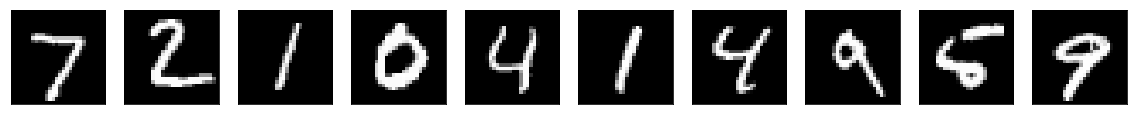

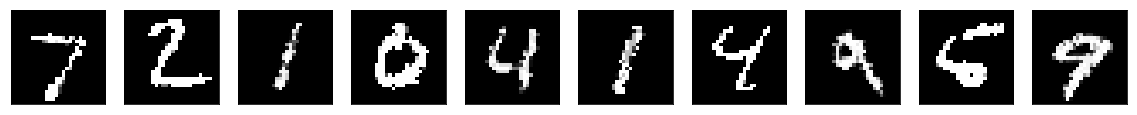

In [ ]:
#Show ten original samples and their corresponding adversarial samples

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(cw_attack_data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
#Implementing the dimensionality reduction (PCA) defense 

#Calculate PCA projection
pca = PCA(100)
pca.fit(data_train)
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

#Transform perturbed CW data using the subspace from the original training data


# create model for PCA
def pca_model():
    model = Sequential()
    
    model=Sequential()
    model.add(Dense(100,input_dim=100,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dense(100,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax"))
    return model

#Create model graph, compile it, and train it using pca_train lables_train 

pca_model = pca_model()
pca_model.compile(loss="categorical_crossentropy",optimizer="adam", metrics = ["accuracy"])
pca_model.summary()
num_epochs = 50
batch_size = 256
pca_model_history=pca_model.fit(pca_train,labels_train,validation_data=(pca_test,labels_test),epochs=num_epochs,batch_size=batch_size,shuffle=True)
scores = pca_model.evaluate(pca_test, labels_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 22,010
Trainable params: 21,610
Non-trainable params: 400
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.4582 

In [ ]:
#Using the defense (and comparing to baseline accuracy)

cw_attack_data_test = pca.transform(cw_attack_data_test)
scores = pca_model.evaluate(cw_attack_data_test, labels_test)
print("CW Accuracy after defense through PCA Model: %2f%%" %(scores[1]*100))

10000/10000 [==============================] - 1s 51us/step
CW Accuracy after defense through PCA Model: 83.650000%


#Part 5: DeepFool 

In [ ]:
#Implementing the DeepFool attack

#DeepFool Instance on trained classifier from Part 1

df = DeepFool(wrap, sess=sess)

#Attack parameters

df_params = {'nb_candidate':10,'max_iter':50, 'clip_min':0.0,'clip_max':1.0}


#Generate adversarial data

df_attack_data_test = df.generate_np(data_test, **df_params)


#Evaluate accuracy of perturbed data on target classifier

df_adv_scores = classifier.evaluate(df_attack_data_test, labels_test)
print("DeepFool Adverserial Attack Accuracy: %2f%%" %(df_adv_scores[1]*100))

W1113 00:15:27.519794 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/cleverhans/utils_tf.py:368: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1113 00:15:29.159167 140568910866304 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks.py:1119: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is no

10000/10000 [==============================] - 1s 74us/step
DeepFool Adverserial Attack Accuracy: 1.630000%


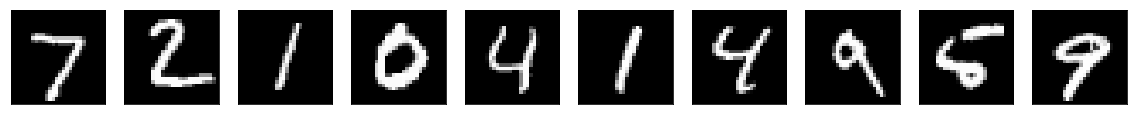

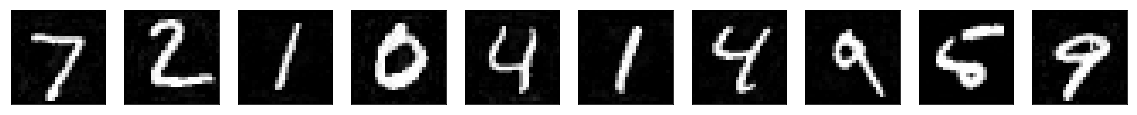

In [ ]:
#Show ten original samples and their corresponding adversarial samples

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(df_attack_data_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
#Implementing the Denoising Autoencoder Defense

def autoencoder():
    auto = Sequential()
    auto.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    auto.add(Dense(200, activation=None, kernel_initializer='normal'))
    auto.add(Dense(100, activation=None, kernel_initializer='normal'))
    auto.add(Dense(200, activation=None, kernel_initializer='normal'))
    auto.add(Dense(400, activation=None, kernel_initializer='normal'))
    auto.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return auto

#Create training data for DAE 
df_attack_data_train = df.generate_np(data_train, **df_params)
data_total_train = np.concatenate([df_attack_data_train, data_train])

#Create and train DAE graph

auto = autoencoder()
auto.summary()
auto.compile(loss="mean_squared_error",optimizer="adam", metrics = ["accuracy"])
num_epochs = 50
batch_size = 256
auto_history=auto.fit(data_total_train,data_total_train,validation_data=(data_test,data_test),epochs=num_epochs,batch_size=batch_size,shuffle=True)


W1113 00:18:24.500349 140568910866304 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               314384    
Total params: 829,284
Trainable params: 829,284
Non-trainable params: 0
_________________________________________________________________
Trai

In [ ]:
#Using the defense

#Use DAE to to remove adversarial perturbation 

df_attack_data_test_recons = auto.predict(df_attack_data_test)
df_scores = classifier.evaluate(df_attack_data_test_recons,labels_test)

#Evaluate accuracy of DeepFool samples after denoising 

print("DeepFool Accuracy after defence through denoising: %2f%%" %(df_scores[1]*100))

10000/10000 [==============================] - 0s 48us/step
DeepFool Accuracy after defence through denoising: 97.740000%


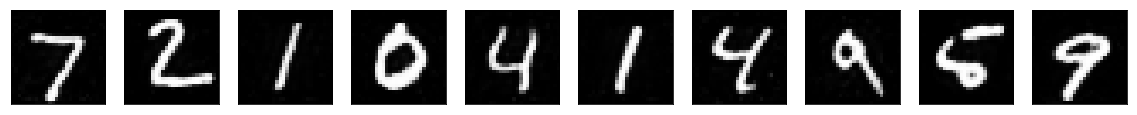

In [ ]:
#Show ten samples of adversarial samples after denoising

n = 10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(df_attack_data_test_recons[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)